In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
import pandas as pd 
import numpy as np 
import os.path 
  
f_name = "/gdrive/My Drive/ML:March2020/Participants/Balaji Ravindaran/face.csv"

In [4]:
# storing the data into a csv file 
def write(name, data): 
  
    if os.path.isfile(f_name): 
  
        df = pd.read_csv(f_name, index_col = 0) 
  
        latest = pd.DataFrame(data, columns = map(str, range(7225))) 
        latest["name"] = name 
  
        df = pd.concat((df, latest), ignore_index = True, sort = False) 
  
    else: 
  
        # Providing range only because the data 
        # here is already flattened for when 
        # it was store in f_list 
        df = pd.DataFrame(data, columns = map(str, range(7225))) 
        df["name"] = name 
  
    df.to_csv(f_name) 


In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Enter your name: balaji


<IPython.core.display.Javascript object>

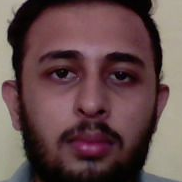

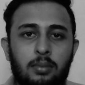

0 <class 'numpy.ndarray'> (85, 85)


<IPython.core.display.Javascript object>

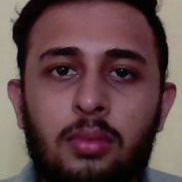

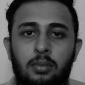

1 <class 'numpy.ndarray'> (85, 85)


<IPython.core.display.Javascript object>

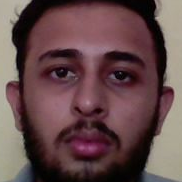

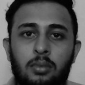

2 <class 'numpy.ndarray'> (85, 85)


<IPython.core.display.Javascript object>

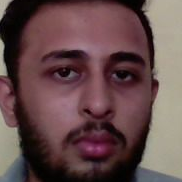

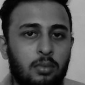

3 <class 'numpy.ndarray'> (85, 85)


<IPython.core.display.Javascript object>

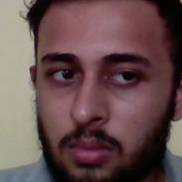

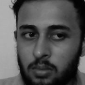

4 <class 'numpy.ndarray'> (85, 85)


<IPython.core.display.Javascript object>

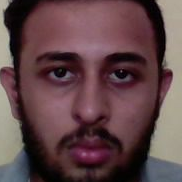

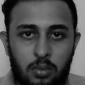

5 <class 'numpy.ndarray'> (85, 85)


<IPython.core.display.Javascript object>

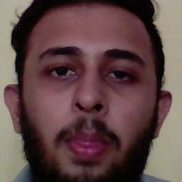

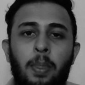

6 <class 'numpy.ndarray'> (85, 85)


<IPython.core.display.Javascript object>

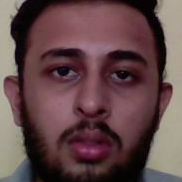

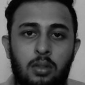

7 <class 'numpy.ndarray'> (85, 85)


<IPython.core.display.Javascript object>

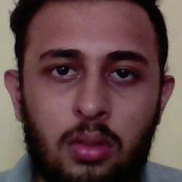

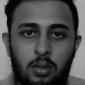

8 <class 'numpy.ndarray'> (85, 85)


<IPython.core.display.Javascript object>

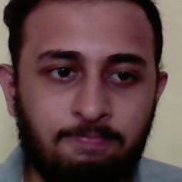

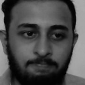

9 <class 'numpy.ndarray'> (85, 85)


In [6]:
name = input("Enter your name: ") 
name=name.lower()
  
from google.colab.patches import cv2_imshow
import cv2

classifier = cv2.CascadeClassifier("/gdrive/My Drive/ML:March2020/data/haarcascade_frontalface_default.xml") 
# this is class used to detect the faces as provided 
# with a haarcascade_frontalface_default.xml file as data 
f_list = [] 
i=0
while i<10: #change for no.of times to take picture
    i=i+1
    filename = take_photo()
    frame = cv2.imread(filename, cv2.IMREAD_UNCHANGED) 
  
    # converting the image into gray 
    # scale as it is easy for detection 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
      
    # detect multiscale, detects the face and its coordinates 
    faces = classifier.detectMultiScale(gray, 1.5, 5) 
      
    # this is used to detect the face which 
    # is closest to the web-cam on the first position 
    faces = sorted(faces, key = lambda x: x[2]*x[3], reverse = True) 
  
    # only the first detected face is used 
    faces = faces[:1]   
       
    # len(faces) is the number of 
    # faces showing in a frame 
    if len(faces) == 1:    
        # this is removing from tuple format       
        face = faces[0]    
        
        # storing the coordinates of the 
        # face in different variables 
        x, y, w, h = face  
  
        # this is will show the face 
        # that is being detected      
        im_face = frame[y:y + h, x:x + w]  
  
        cv2_imshow(im_face)
        if len(faces) == 1: 
            gray_face = cv2.cvtColor(im_face, cv2.COLOR_BGR2GRAY) 
            gray_face = cv2.resize(gray_face, (85, 85)) 
            cv2_imshow(gray_face)
            print(len(f_list), type(gray_face), gray_face.shape) 
  
            # this will append the face's coordinates in f_list 
            f_list.append(gray_face.reshape(-1)) 

In [8]:
f_list
write(name, np.array(f_list))  